# Overview

This week we will continue to use Euler's method to solve problems that we couldn't otherwise solve.  This week that problem will involve the motion of a satellite in orbit.

## Physics

The acceleration of an object moving in the gravitational field of the Earth is
$$\vec{a} = −{GM_E\vec{r} \over r^3}$$

where $\vec{r}$ is the position vector directed from the center of the Earth toward the object. Choosing the origin to be at the center of the Earth and assuming that the small object is moving in the x-y plane, the rectangular (cartesian) components of its acceleration are:

$$a_x=− {GM_Ex \over (x^2 + y^2)^{3/2}}$$

$$a_y=− {GM_Ey \over (x^2 + y^2)^{3/2}}$$


## Your problem

Using Python, model the motion of an object orbiting the earth. Assume that the initial position of the object is $x = 0$, $y = 2R_E$ ($R_E$ is the radius of the earth). Give the object an initial velocity of $5000$ m/s in the x-direction. Use $dt = 5$ s.

Complete the following:

1. Below you will find the begninings of a python code (with comments) to calculate the orbit of the satellite.  Finish the code off and ensure that the resulting plot looks reasonable.

2.  Using trial and error, determine the time it takes to make a full orbit.

3. Instead of using trial and error, try using an "if" statement to find the time for a full orbit.

4.  What do you think would happen if you increased (or decreased) the initial speed of the satellite?  Hypothesize and then check your hypothesis.

5. Gravity is an inverse square law because the strength of the gravitational force decreases as the *square* of the distance.  What kind of orbits would you expect if gravity was an inverse cube law.  To investigate this, change the acceleration components to: (notice the exponent in the denominator)

$$a_x=− {GM_Ex \over (x^2 + y^2)^2}$$

$$a_y=− {GM_Ey \over (x^2 + y^2)^2}$$

Modify your code and observe the resulting orbit


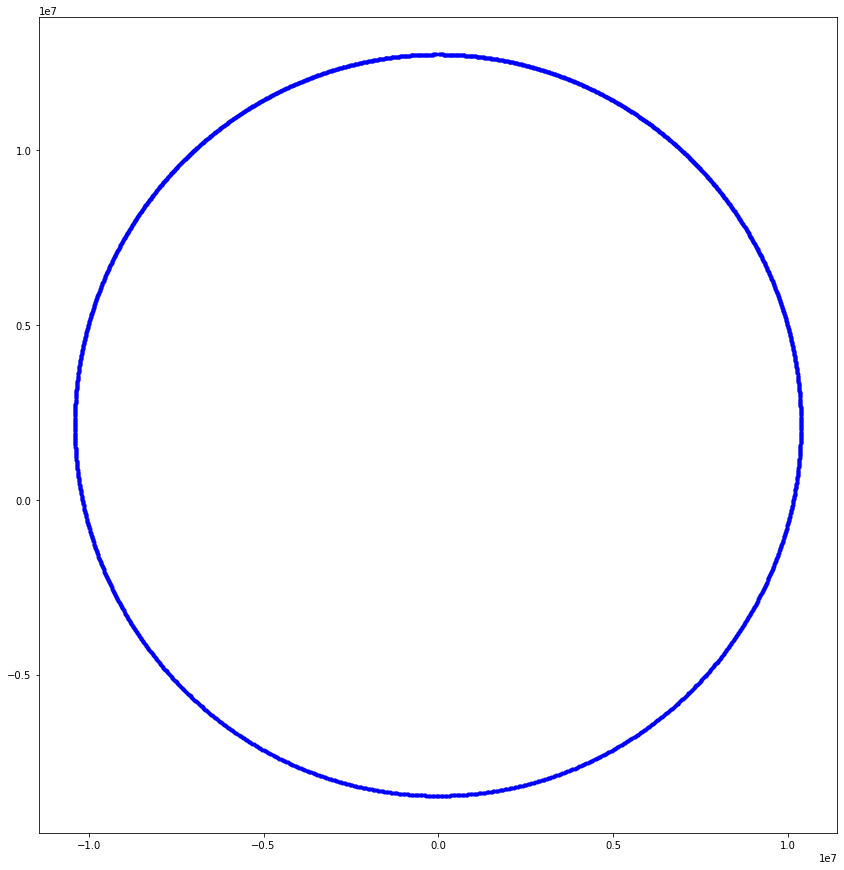

In [10]:
from matplotlib import pyplot
G = 6.67e-11  #Gravitational constant
mE = 5.98e24 # Mass of the Earth
rE = 6.37e6  # Radius of the Earth

# Initial conditions
x = 0
y = 2 * rE
vx = 5000
vy = 0
t = 0

dt = 5
tMax = 10850  # How long will the simulation run


fig,graph = pyplot.subplots(1,1,figsize = (15,15))  # Initialize the plot canvas.

while t < tMax:
    #Euler's Method:
    ax = -G*mE*x/(x**2 + y**2)**(3/2)
    ay = -G*mE*y/(x**2 + y**2)**(3/2)

    vx = ax*dt + vx
    vy = ay*dt + vy

    x = vx*dt + x
    y = vy*dt + y

    t = dt + t
    

    graph.plot(x,y,'b.')  # Plot single point in the satellite's trajectory

graph.set_aspect(1)  # Set the aspect ratio to 1 so a circular orbit doesn't look elliptical
    
pyplot.show()


2. Using trial and error, I have determined that the period of orbit is about 10850 seconds, which is about 3 hours. 

## My if statement approach to finding the period of orbit. 

The period of orbit is 10860 s, which is 3.0 h. 
10860


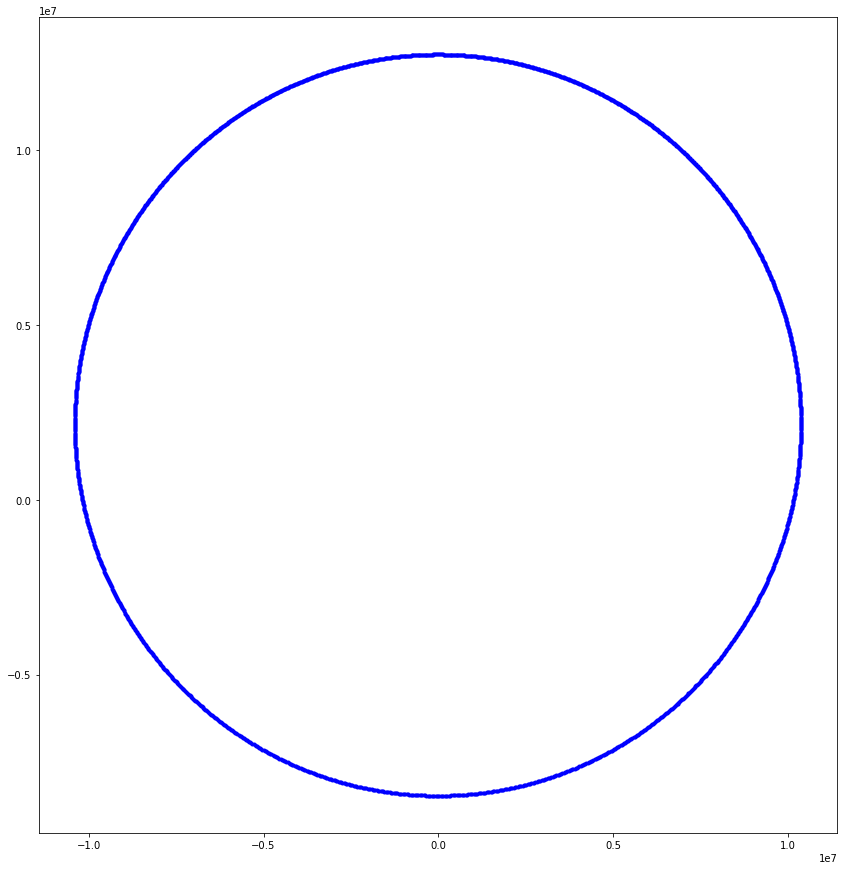

In [6]:
from matplotlib import pyplot
G = 6.67e-11  #Gravitational constant
mE = 5.98e24 # Mass of the Earth
rE = 6.37e6  # Radius of the Earth

# Initial conditions
x0 = 0
x = x0
y = 2 * rE
vx = 5000
vy = 0
t = 0

dt = 5

x_points = []
y_points = []

fig,graph = pyplot.subplots(1,1,figsize = (15,15))  # Initialize the plot canvas.

while True:
    #Euler's Method:
    ax = -G*mE*x/(x**2 + y**2)**(3/2)
    ay = -G*mE*y/(x**2 + y**2)**(3/2)

    vx = ax*dt + vx
    vy = ay*dt + vy

    if x < x0 and (x + vx*dt) > x0:
        #if we are approaching x0 again, then stop the loop
        break

    x = vx*dt + x
    y = vy*dt + y

    t = dt + t
    

    x_points.append(x)
    y_points.append(y)  # Plot single point in the satellite's trajectory

pyplot.plot(x_points,y_points, 'b.')
graph.set_aspect(1)  # Set the aspect ratio to 1 so a circular orbit doesn't look elliptical
print(f'The period of orbit is {t} s, which is {(t/3600):.1f} h. ')
print(t)
pyplot.show()


4. I think that increasing the initial speed will make the orbit more eliptical, but won't change the period of orbit. 

Tested: The orbit was still circular, but the earth was not at the center of the orbit. Also, the period did change. When $v_{x0} = 6000$, the period was 18250 s, which is about 5.1 hours. 

5. Inverse Cube Law Version

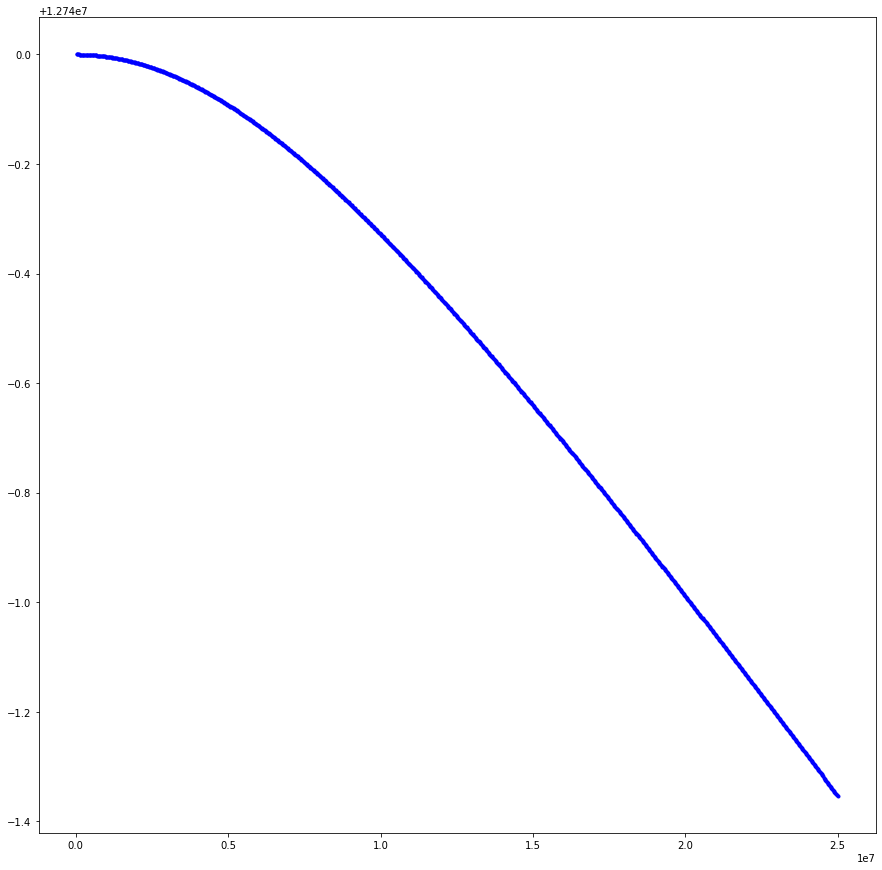

In [9]:
from matplotlib import pyplot
G = 6.67e-11  #Gravitational constant
mE = 5.98e24 # Mass of the Earth
rE = 6.37e6  # Radius of the Earth

# Initial conditions
x = 0
y = 2 * rE
vx = 5000
vy = 0
t = 0

dt = 5
tMax = 5000  # How long will the simulation run


fig,graph = pyplot.subplots(1,1,figsize = (15,15))  # Initialize the plot canvas.

while t < tMax:
    #Euler's Method:
    ax = -G*mE*x/(x**2 + y**2)**(2)
    ay = -G*mE*y/(x**2 + y**2)**(2)

    vx = ax*dt + vx
    vy = ay*dt + vy

    x = vx*dt + x
    y = vy*dt + y

    t = dt + t
    

    graph.plot(x,y,'b.')  # Plot single point in the satellite's trajectory

#graph.set_aspect(1)  # Don't set the aspect ratio for the last part. 
    
pyplot.show()

I could not get the code to give a reasonable result when I changed the exponent in the denominator. 